In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import statistics
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import joblib
from sklearn.neighbors import KNeighborsClassifier

### Monk1

In [4]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk1_tr = pd.read_csv("./data/monks-1.train", sep = " ", skipinitialspace=True, names = colnames)
monk1_tr = monk1_tr.drop('id', axis = 1)

monk1_ts = pd.read_csv("./data/monks-1.test", sep = " ", skipinitialspace=True, names = colnames)
monk1_ts = monk1_ts.drop('id', axis = 1)

In [6]:
x_monk1_tr = monk1_tr.iloc[:, 1:7].values
y_monk1_tr = monk1_tr.iloc[:, 0].values

x_monk1_ts = monk1_ts.iloc[:, 1:7].values
y_monk1_ts = monk1_ts.iloc[:, 0].values

In [7]:
one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk1_tr)
x_monk1_tr = one_hot_encoder_tr.transform(x_monk1_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk1_ts)
x_monk1_ts = one_hot_encoder_ts.transform(x_monk1_ts)

x_monk1_tr, y_monk1_tr = shuffle(x_monk1_tr, y_monk1_tr)
x_monk1_ts, y_monk1_ts = shuffle(x_monk1_ts, y_monk1_ts)

### KNN Grid Search CV

In [24]:
'''
First tries --> np.range(1,90), then [2,5,7,8,10,11,12,13,14,15,20,25,30,35,40,45,50,60,70,80,90] 
'''
param_grid = {
    'n_neighbors': [5,7,8,10,11,12,13,14,15,20,25,30],
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'metric': ['cityblock', 'euclidean','l1','l2','manhattan']
}


knn =  KNeighborsClassifier()


grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)


grid.fit(x_monk1_tr, y_monk1_tr)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=uniform;, score=0.720 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=uniform;, score=0.680 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=uniform;, score=0.750 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=distance;, score=0.880 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=distance;, score=0.760 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=5, weights=distance;, score=0.840 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=cityblock

In [25]:
knn = grid.best_estimator_
knn

KNeighborsClassifier(algorithm='ball_tree', metric='cityblock', n_neighbors=11,
                     weights='distance')

In [26]:
score = knn.score(x_monk1_tr, y_monk1_tr)
print("Final accuracy on the training set: " + str(score))

Final accuracy on the training set: 1.0


## Model assesment

In [27]:
print("Final accuracy on the test set: " + str(knn.score(x_monk1_ts, y_monk1_ts)))

Final accuracy on the test set: 0.8217592592592593


### Monk 2

In [28]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk2_tr = pd.read_csv("./data/monks-2.train", sep = " ", skipinitialspace=True, names = colnames)
monk2_tr = monk2_tr.drop('id', axis = 1)

monk2_ts = pd.read_csv("./data/monks-2.test", sep = " ", skipinitialspace=True, names = colnames)
monk2_ts = monk2_ts.drop('id', axis = 1)

x_monk2_tr = monk2_tr.iloc[:, 1:7].values
y_monk2_tr = monk2_tr.iloc[:, 0].values

x_monk2_ts = monk2_ts.iloc[:, 1:7].values
y_monk2_ts = monk2_ts.iloc[:, 0].values


one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk2_tr)
x_monk2_tr = one_hot_encoder_tr.transform(x_monk2_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk2_ts)
x_monk2_ts = one_hot_encoder_ts.transform(x_monk2_ts)

x_monk2_tr, y_monk2_tr = shuffle(x_monk2_tr, y_monk2_tr)
x_monk2_ts, y_monk2_ts = shuffle(x_monk2_ts, y_monk2_ts)

### Grid Search CV

In [30]:
param_grid = {
    'n_neighbors': np.arange(1,60),
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'metric': ['cityblock', 'euclidean','l1','l2','manhattan']
}


knn2 =  KNeighborsClassifier()


grid = GridSearchCV(
    knn2,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)


grid.fit(x_monk2_tr, y_monk2_tr)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)


knn2 = grid.best_estimator_

score = knn2.score(x_monk2_tr, y_monk2_tr)
print("Final accuracy on the training set: " + str(score))

print("Final accuracy on the test set: " + str(knn2.score(x_monk2_ts, y_monk2_ts)))


Fitting 5 folds for each of 2360 candidates, totalling 11800 fits
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.529 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.471 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.588 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=1, weights=distance;, score=0.529 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=1, weights=distance;, score=0.588 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=1, weights=distance;, score=0.471 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=cityblo

### Monk3

In [31]:
colnames = ['class', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'id']
monk3_tr = pd.read_csv("./data/monks-3.train", sep = " ", skipinitialspace=True, names = colnames)
monk3_tr = monk3_tr.drop('id', axis = 1)

monk3_ts = pd.read_csv("./data/monks-3.test", sep = " ", skipinitialspace=True, names = colnames)
monk3_ts = monk3_ts.drop('id', axis = 1)

x_monk3_tr = monk3_tr.iloc[:, 1:7].values
y_monk3_tr = monk3_tr.iloc[:, 0].values

x_monk3_ts = monk3_ts.iloc[:, 1:7].values
y_monk3_ts = monk3_ts.iloc[:, 0].values


one_hot_encoder_tr = OneHotEncoder(sparse=False)
one_hot_encoder_tr.fit(x_monk3_tr)
x_monk3_tr = one_hot_encoder_tr.transform(x_monk3_tr)

one_hot_encoder_ts = OneHotEncoder(sparse=False)
one_hot_encoder_ts.fit(x_monk3_ts)
x_monk3_ts = one_hot_encoder_ts.transform(x_monk3_ts)

x_monk3_tr, y_monk3_tr = shuffle(x_monk3_tr, y_monk3_tr)
x_monk3_ts, y_monk3_ts = shuffle(x_monk3_ts, y_monk3_ts)

### Grid Search CV

In [37]:
param_grid = {
    'n_neighbors': np.arange(30,95),
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'metric': ['cityblock', 'euclidean','l1','l2','manhattan']
}


knn3 =  KNeighborsClassifier()


grid = GridSearchCV(
    knn3,
    param_grid,
    cv=5,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)


grid.fit(x_monk3_tr, y_monk3_tr)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)


knn3 = grid.best_estimator_

score = knn3.score(x_monk3_tr, y_monk3_tr)
print("Final accuracy on the training set: " + str(score))

print("Final accuracy on the test set: " + str(knn3.score(x_monk3_ts, y_monk3_ts)))


Fitting 5 folds for each of 2600 candidates, totalling 13000 fits
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=30, weights=uniform;, score=0.880 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=30, weights=uniform;, score=0.920 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=30, weights=uniform;, score=0.917 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=cityblock, n_neighbors=30, weights=uniform;, score=0.750 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=cityblock, n_neighbors=30, weights=uniform;, score=0.833 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=cityblock, n_neighbors=30, weights=distance;, score=0.880 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=cityblock, n_neighbors=30, weights=distance;, score=0.960 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=cityblock, n_neighbors=30, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=auto, metric

## (Theory) trials for overfitting values to avoid in specific split

##### We evaluate on Monk3, considering values in range(30,95) of neighbours param

#### RandomState=42, so It's dependent on the val split

In [50]:
neighbours = [i for i in range(1,86)]

>1, train: 1.000, test: 0.838
>2, train: 1.000, test: 0.838
>3, train: 1.000, test: 0.838
>4, train: 1.000, test: 0.892
>5, train: 1.000, test: 0.919
>6, train: 1.000, test: 0.919
>7, train: 1.000, test: 0.919
>8, train: 1.000, test: 0.919
>9, train: 1.000, test: 0.919
>10, train: 1.000, test: 0.973
>11, train: 1.000, test: 0.919
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 0.946
>14, train: 1.000, test: 0.973
>15, train: 1.000, test: 0.946
>16, train: 1.000, test: 0.973
>17, train: 1.000, test: 0.973
>18, train: 1.000, test: 0.973
>19, train: 1.000, test: 0.973
>20, train: 1.000, test: 0.973
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 0.973
>24, train: 1.000, test: 0.973
>25, train: 1.000, test: 0.973
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 0.973
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

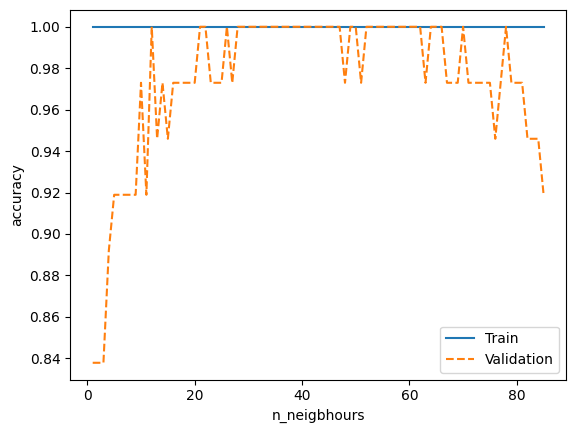

In [63]:
# Hold out train/val
X_train, X_val, y_train, y_val = train_test_split(x_monk3_tr, y_monk3_tr, test_size=0.3,random_state=42)

# evaluate for each neighbour value
train_scores, test_scores = list(), list()
for i in neighbours:
	# configure the model
	model = KNeighborsClassifier(algorithm='auto',metric='cityblock',n_neighbors=i,weights='distance',)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_val)
	test_acc = accuracy_score(y_val, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

# plot of train and test scores vs tree depth
pyplot.plot(neighbours, train_scores, label='Train')
pyplot.plot(neighbours, test_scores, '--', label='Validation')
pyplot.legend()
pyplot.xlabel('n_neigbhours')
pyplot.ylabel('accuracy')
pyplot.show()